# PDF Exctract

In [4]:
import numpy as np
import pandas as pd
import os
import re
import importlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from imageio import imread

import xbrl_image_parser as xip



**Grab test PDF images. Xip is doing quite a bit here:**
- Converting to PNG 

- Runs preprocessing (greyscale, black/white, etc.) 

- Applies OCR  

- Find locations of elements on page + converts them to variabels  

- Converts strings to numeric values where possible 

- Filters sheets by balance statement sheets only (spelling flags)  

- Detects and extracts lines 

In [5]:
files = [filename.split(".")[0] for filename in os.listdir("./example_data_PDF") if ".pdf" in filename]

def process(filename): 
    importlib.reload(xip)
    df = xip.process_PDF('./example_data_PDF' + filename)
    return df 

In [6]:
files[:2]

['02266230', '2303730']

**Apply new function process to iterarte over pdf's**

In [ ]:
for file in files: 
    importlib.reload(xip)
    results = xip.process_PDF("./example_data_PDF/" + file + '.pdf')
    results.to_csv('./v2_xip_output/' + file+'.csv')

**New format is much more friendly**

In [33]:
## Test
importlib.reload(xip)
results = xip.process_PDF("./example_data_PDF/" + t)
results

Converting PDF image to multiple png files
./example_data_PDF/02266230.pdf
Performing pre-processing on all png images


,conf,currYr,label,source,value,year,unit
0,96.0,1.0,Tangible assets,Tangible assets 10 358613 35963,358613,2015.0,£
1,96.0,0.0,Tangible assets,Tangible assets 10 358613 35963,35963,2014.0,£
2,95.0,1.0,Stocks,Stocks 11 657735 404931,657735,2015.0,£
3,96.0,0.0,Stocks,Stocks 11 657735 404931,404931,2014.0,£
4,96.0,1.0,Debtors,Debtors 12 19626898 36195849,19626898,2015.0,£
5,96.0,0.0,Debtors,Debtors 12 19626898 36195849,36195849,2014.0,£
6,96.0,1.0,Cash at bank and in hand,Cash at bank and in hand 953 4003,953,2015.0,£
7,96.0,0.0,Cash at bank and in hand,Cash at bank and in hand 953 4003,4003,2014.0,£
8,96.0,1.0,CREDITORS amounts falling due within one year,one year 13 18180602 33569518,18180602,2015.0,£
9,75.0,0.0,CREDITORS amounts falling due within one year,one year 13 18180602 33569518,33569518,2014.0,£


## EDA of Balance Sheets

**Extract all pdf's**

In [41]:
balance_sheets = dict()
files = [filename.split(".")[0] for filename in os.listdir("./example_data_PDF") if ".pdf" in filename]
for file in files: 
    balance_sheets[str(file)] = pd.read_csv('./v2_xip_output/' +file + '.csv')

In [236]:
index = list(files)
financials = pd.DataFrame(index).reset_index()
financials['Assets'] = 0
financials['PL'] = 0

**Pull financial Data**
- Stuck to Assets Less Liabilities and Profit and Loss Ratio for time being

In [237]:
for i in range(len(files)): 
    balance_sheets[files[i]]['label'] = balance_sheets[files[i]]['label'].str.upper()
    try: 
        assets = list(balance_sheets[files[i]][balance_sheets[files[i]]['label'].str.contains('ASSETS LESS')]['source'][:1].str.split()).pop(0)
        pl = list(baalance_sheets[files[i]][balance_sheets[files[i]]['label'].str.contains('PROFIT AND LOSS')]['source'][:1].str.split()).pop(0)
        financials['Assets'][i] = assets[5]
        financials['PL'][i] = pl[4]
    except: IndexError

In [238]:
financials = financials.drop(columns = 'index')
financials = financials.rename(columns = {0 : 'id'})

In [246]:
financials

,id,Assets,PL
0,02266230,2463597,20
1,2303730,65588,17
2,1983517,15933573,15933473
3,04558828,0,0
4,06034603,82877,80376
5,00553535,0,0
6,00053475,0,0
7,00002404,51346,20
8,01539777,10514824,9294403
9,06005142,0,0


In [240]:
balance_sheets['00030177'][balance_sheets['00030177']['label'].str.contains('PROFIT')]

,Unnamed: 0,conf,currYr,label,source,value,year,unit
28,28,96.0,1.0,PROFIT AND LOSS ACCOUNT,Profit and Loss Account 70699 71354,70699,2016.0,£000
29,29,94.0,0.0,PROFIT AND LOSS ACCOUNT,Profit and Loss Account 70699 71354,71354,2015.0,£000


In [241]:
for i in range(len(financials)): 
    if financials['PL'][i] == '.':
        financials['PL'][i] = 0

**Plot**

In [242]:
financials.PL = financials.PL.astype('int')

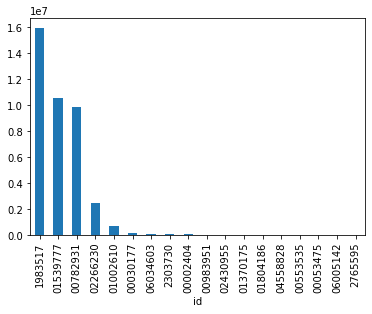

In [243]:
financials.groupby('id')['Assets'].sum().sort_values(ascending = False).plot(kind ='bar')

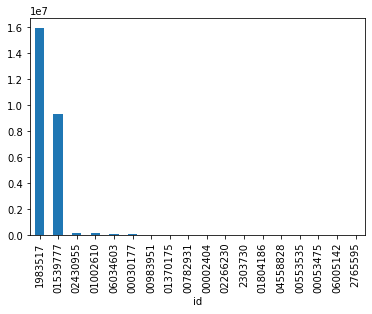

In [244]:
financials.groupby('id')['PL'].sum().sort_values(ascending = False).plot(kind ='bar')

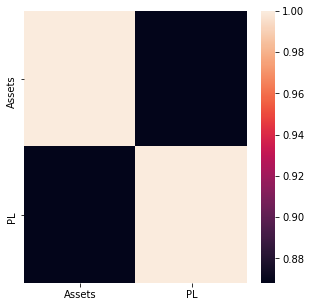

In [245]:
import seaborn as sns
corr = financials.set_index('id').corr()
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(corr,)

## **Takeaways with this method:**
- Format is much more friendly
- Separation of data is better. Not great, but easier to navigate
- Accurate extraction for the most part, depends on quality of scan or input
